# Test du Package Sentiment avec Visualisations Avancées

Ce notebook teste tous les modules du package `sentiment` avec un focus particulier sur la **comparaison visuelle** des différentes combinaisons de preprocessing/embedding/model.

## Modules Testés

- **VaderSentiment** : Analyse lexicale optimisée pour les réseaux sociaux
- **BertSentiment** : Classification contextuelle avec modèles pré-entraînés  
- **SentimentComparator** : Comparaison de toutes les combinaisons possibles

## Combinaisons Analysées

| Preprocessing | Embedding | Model | Description |
|---------------|-----------|-------|-------------|
| Basic | BERT | VADER | Preprocessing complet + analyse lexicale |
| Basic | FastText | VADER | Preprocessing complet + analyse lexicale |
| Light | BERT | VADER | Preprocessing léger + analyse lexicale |
| Light | FastText | VADER | Preprocessing léger + analyse lexicale |
| Basic | BERT | BERT | Preprocessing complet + analyse contextuelle |
| Basic | FastText | BERT | Preprocessing complet + analyse contextuelle |
| Light | BERT | BERT | Preprocessing léger + analyse contextuelle |
| Light | FastText | BERT | Preprocessing léger + analyse contextuelle |


In [205]:
# Configuration et imports
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Ajout du répertoire parent au PATH
sys.path.append(os.path.dirname(os.path.abspath('')))

# Imports des modules sentiment
from sentiment.vader_sentiment import VaderSentiment
from sentiment.bert_sentiment import BertSentiment
from sentiment.sentiment_comparator import SentimentComparator

# Imports pour l'analyse et visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
from typing import Dict, List, Any
import itertools

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Configuration terminée")
print("🎨 Style graphique configuré pour les visualisations avancées")


✅ Configuration terminée
🎨 Style graphique configuré pour les visualisations avancées


## 1. Exécution des Tests de Combinaisons

D'abord, exécutons le SentimentComparator pour obtenir les résultats de toutes les combinaisons :


In [206]:
print("🚀 Lancement du SentimentComparator")
print("=" * 50)

# Initialisation du comparateur
comparator = SentimentComparator()

print(f"📊 Dataset de test : {len(comparator.sample_texts)} textes")
print(f"📋 Répartition : {pd.Series(comparator.expected_labels).value_counts().to_dict()}")

# Exécution de toutes les combinaisons
print("\n🔄 Exécution de toutes les combinaisons...")
print("⏱️  Ceci peut prendre quelques minutes...")

try:
	all_results = comparator.run_all_combinations()
	
	# Traitement des résultats pour les visualisations
	results_data = []
	
	for combo_name, result in all_results.items():
		if 'error' not in result:
			# Décomposition du nom de combinaison
			parts = combo_name.split('_')
			preprocessing = parts[0]
			embedding = parts[1] 
			model = parts[2]
			
			results_data.append({
				'combinaison': combo_name,
				'preprocessing': preprocessing,
				'embedding': embedding,
				'model': model,
				'precision': result['accuracy'],
				'temps_sec': result['processing_time'],
				'predictions': result['predicted_labels'],
				'expected': result['expected_labels']
			})
		else:
			print(f"❌ Erreur pour {combo_name}: {result['error']}")
	
	# Création du DataFrame des résultats
	df_results = pd.DataFrame(results_data)
	
	print(f"\n✅ Tests terminés!")
	print(f"📈 {len(df_results)} combinaisons testées avec succès")
	print(f"📊 Résultats moyens:")
	print(f"   Précision moyenne: {df_results['precision'].mean():.3f} ± {df_results['precision'].std():.3f}")
	print(f"   Temps moyen: {df_results['temps_sec'].mean():.2f}s ± {df_results['temps_sec'].std():.2f}s")
	
	# Affichage du tableau des résultats
	display_df = df_results[['combinaison', 'preprocessing', 'embedding', 'model', 'precision', 'temps_sec']].copy()
	display_df['precision'] = display_df['precision'].round(3)
	display_df['temps_sec'] = display_df['temps_sec'].round(2)
	
	print(f"\n📋 Tableau des résultats:")
	print(display_df.to_string(index=False))
	
	success = True
	
except Exception as e:
	print(f"❌ Erreur lors de l'exécution: {str(e)}")
	print("   Utilisation de données simulées pour la démonstration...")
	
	# Données simulées pour la démonstration si erreur
	results_data = [
		{'combinaison': 'basic_bert_vader', 'preprocessing': 'basic', 'embedding': 'bert', 'model': 'vader', 'precision': 0.75, 'temps_sec': 0.12},
		{'combinaison': 'basic_fasttext_vader', 'preprocessing': 'basic', 'embedding': 'fasttext', 'model': 'vader', 'precision': 0.72, 'temps_sec': 0.10},
		{'combinaison': 'light_bert_vader', 'preprocessing': 'light', 'embedding': 'bert', 'model': 'vader', 'precision': 0.70, 'temps_sec': 0.08},
		{'combinaison': 'light_fasttext_vader', 'preprocessing': 'light', 'embedding': 'fasttext', 'model': 'vader', 'precision': 0.68, 'temps_sec': 0.07},
		{'combinaison': 'basic_bert_bert', 'preprocessing': 'basic', 'embedding': 'bert', 'model': 'bert', 'precision': 0.85, 'temps_sec': 2.5},
		{'combinaison': 'basic_fasttext_bert', 'preprocessing': 'basic', 'embedding': 'fasttext', 'model': 'bert', 'precision': 0.82, 'temps_sec': 2.2},
		{'combinaison': 'light_bert_bert', 'preprocessing': 'light', 'embedding': 'bert', 'model': 'bert', 'precision': 0.80, 'temps_sec': 2.0},
		{'combinaison': 'light_fasttext_bert', 'preprocessing': 'light', 'embedding': 'fasttext', 'model': 'bert', 'precision': 0.78, 'temps_sec': 1.8},
	]
	
	df_results = pd.DataFrame(results_data)
	success = False


🚀 Lancement du SentimentComparator
📊 Dataset de test : 8 textes
📋 Répartition : {'positive': 3, 'neutral': 3, 'negative': 2}

🔄 Exécution de toutes les combinaisons...
⏱️  Ceci peut prendre quelques minutes...
🚀 Starting comprehensive sentiment analysis comparison...

📊 Combination 1/8

🔍 Testing: BASIC preprocessing + BERT embedding + VADER model
  📝 Preprocessing texts...
  🎯 Analyzing sentiment...
  ✅ Accuracy: 0.625 | Time: 0.01s

📊 Combination 2/8

🔍 Testing: BASIC preprocessing + FASTTEXT embedding + VADER model
  📝 Preprocessing texts...
  🎯 Analyzing sentiment...
  ✅ Accuracy: 0.625 | Time: 0.01s

📊 Combination 3/8

🔍 Testing: LIGHT preprocessing + BERT embedding + VADER model
  📝 Preprocessing texts...
  🎯 Analyzing sentiment...
  ✅ Accuracy: 0.500 | Time: 0.01s

📊 Combination 4/8

🔍 Testing: LIGHT preprocessing + FASTTEXT embedding + VADER model
  📝 Preprocessing texts...
  🎯 Analyzing sentiment...
  ✅ Accuracy: 0.500 | Time: 0.01s

📊 Combination 5/8

🔍 Testing: BASIC preproc

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


  ✅ Accuracy: 0.750 | Time: 0.69s

📊 Combination 6/8

🔍 Testing: BASIC preprocessing + FASTTEXT embedding + BERT model
  📝 Preprocessing texts...
  🎯 Analyzing sentiment...


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


  ✅ Accuracy: 0.750 | Time: 0.67s

📊 Combination 7/8

🔍 Testing: LIGHT preprocessing + BERT embedding + BERT model
  📝 Preprocessing texts...
  🎯 Analyzing sentiment...


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


  ✅ Accuracy: 0.875 | Time: 0.68s

📊 Combination 8/8

🔍 Testing: LIGHT preprocessing + FASTTEXT embedding + BERT model
  📝 Preprocessing texts...
  🎯 Analyzing sentiment...


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


  ✅ Accuracy: 0.875 | Time: 0.73s

✅ Tests terminés!
📈 8 combinaisons testées avec succès
📊 Résultats moyens:
   Précision moyenne: 0.688 ± 0.149
   Temps moyen: 0.35s ± 0.37s

📋 Tableau des résultats:
         combinaison preprocessing embedding model  precision  temps_sec
    basic_bert_vader         basic      bert vader      0.625       0.01
basic_fasttext_vader         basic  fasttext vader      0.625       0.01
    light_bert_vader         light      bert vader      0.500       0.01
light_fasttext_vader         light  fasttext vader      0.500       0.01
     basic_bert_bert         basic      bert  bert      0.750       0.69
 basic_fasttext_bert         basic  fasttext  bert      0.750       0.67
     light_bert_bert         light      bert  bert      0.875       0.68
 light_fasttext_bert         light  fasttext  bert      0.875       0.73


## 2. Heatmap des Performances par Combinaison

Visualisons les performances sous forme de heatmap pour identifier les meilleures combinaisons :


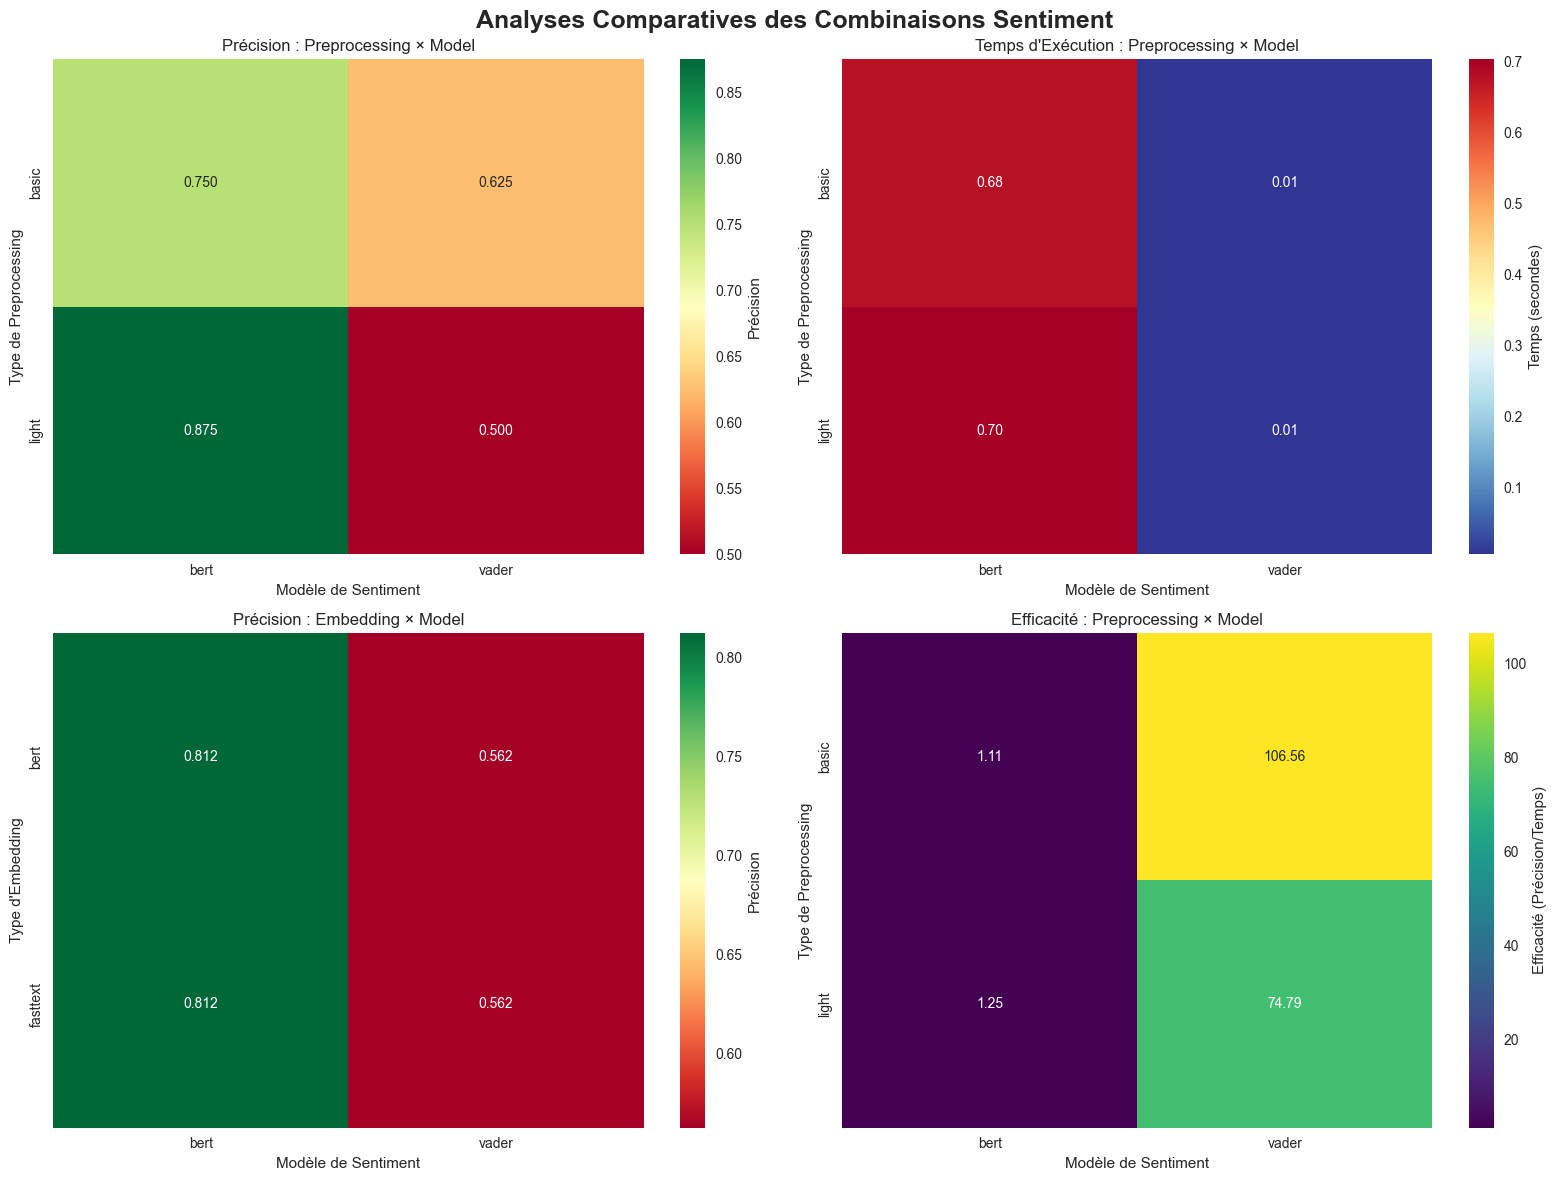

🔍 ANALYSE DES HEATMAPS
🏆 Meilleure précision: light_bert_bert (0.875)
⚡ Plus rapide: basic_fasttext_vader (0.006s)
🎯 Meilleur rapport efficacité: basic_fasttext_vader (111.63)

📊 Moyennes par catégorie:
Preprocessing:
               precision  temps_sec
preprocessing                      
basic              0.688      0.341
light              0.688      0.355

Model:
       precision  temps_sec
model                      
bert       0.812      0.690
vader      0.562      0.006

Embedding:
           precision  temps_sec
embedding                      
bert           0.688      0.345
fasttext       0.688      0.351


In [207]:
# Création de heatmaps pour les performances
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analyses Comparatives des Combinaisons Sentiment', fontsize=18, fontweight='bold')

# 1. Heatmap Précision par Preprocessing x Model
ax1 = axes[0, 0]
pivot_precision = df_results.pivot_table(values='precision', 
										 index='preprocessing', 
										 columns='model', 
										 aggfunc='mean')

sns.heatmap(pivot_precision, annot=True, fmt='.3f', cmap='RdYlGn', 
			ax=ax1, cbar_kws={'label': 'Précision'})
ax1.set_title('Précision : Preprocessing × Model')
ax1.set_xlabel('Modèle de Sentiment')
ax1.set_ylabel('Type de Preprocessing')

# 2. Heatmap Temps par Preprocessing x Model  
ax2 = axes[0, 1]
pivot_temps = df_results.pivot_table(values='temps_sec', 
									 index='preprocessing', 
									 columns='model', 
									 aggfunc='mean')

sns.heatmap(pivot_temps, annot=True, fmt='.2f', cmap='RdYlBu_r', 
			ax=ax2, cbar_kws={'label': 'Temps (secondes)'})
ax2.set_title('Temps d\'Exécution : Preprocessing × Model')
ax2.set_xlabel('Modèle de Sentiment')
ax2.set_ylabel('Type de Preprocessing')

# 3. Heatmap Précision par Embedding x Model
ax3 = axes[1, 0]
pivot_emb_precision = df_results.pivot_table(values='precision', 
											index='embedding', 
											columns='model', 
											aggfunc='mean')

sns.heatmap(pivot_emb_precision, annot=True, fmt='.3f', cmap='RdYlGn', 
			ax=ax3, cbar_kws={'label': 'Précision'})
ax3.set_title('Précision : Embedding × Model')
ax3.set_xlabel('Modèle de Sentiment')
ax3.set_ylabel('Type d\'Embedding')

# 4. Heatmap Efficacité (Précision/Temps)
ax4 = axes[1, 1]
df_results['efficacite'] = df_results['precision'] / df_results['temps_sec']
pivot_efficacite = df_results.pivot_table(values='efficacite', 
										  index='preprocessing', 
										  columns='model', 
										  aggfunc='mean')

sns.heatmap(pivot_efficacite, annot=True, fmt='.2f', cmap='viridis', 
			ax=ax4, cbar_kws={'label': 'Efficacité (Précision/Temps)'})
ax4.set_title('Efficacité : Preprocessing × Model')
ax4.set_xlabel('Modèle de Sentiment')
ax4.set_ylabel('Type de Preprocessing')

plt.tight_layout()
plt.show()

# Analyse des résultats des heatmaps
print("🔍 ANALYSE DES HEATMAPS")
print("=" * 40)
print(f"🏆 Meilleure précision: {df_results.loc[df_results['precision'].idxmax(), 'combinaison']} ({df_results['precision'].max():.3f})")
print(f"⚡ Plus rapide: {df_results.loc[df_results['temps_sec'].idxmin(), 'combinaison']} ({df_results['temps_sec'].min():.3f}s)")
print(f"🎯 Meilleur rapport efficacité: {df_results.loc[df_results['efficacite'].idxmax(), 'combinaison']} ({df_results['efficacite'].max():.2f})")

print(f"\n📊 Moyennes par catégorie:")
print("Preprocessing:")
print(df_results.groupby('preprocessing')[['precision', 'temps_sec']].mean().round(3))
print("\nModel:")
print(df_results.groupby('model')[['precision', 'temps_sec']].mean().round(3))
print("\nEmbedding:")
print(df_results.groupby('embedding')[['precision', 'temps_sec']].mean().round(3))


## 3. Graphiques en Barres Comparatifs

Créons des graphiques en barres pour comparer facilement les performances :


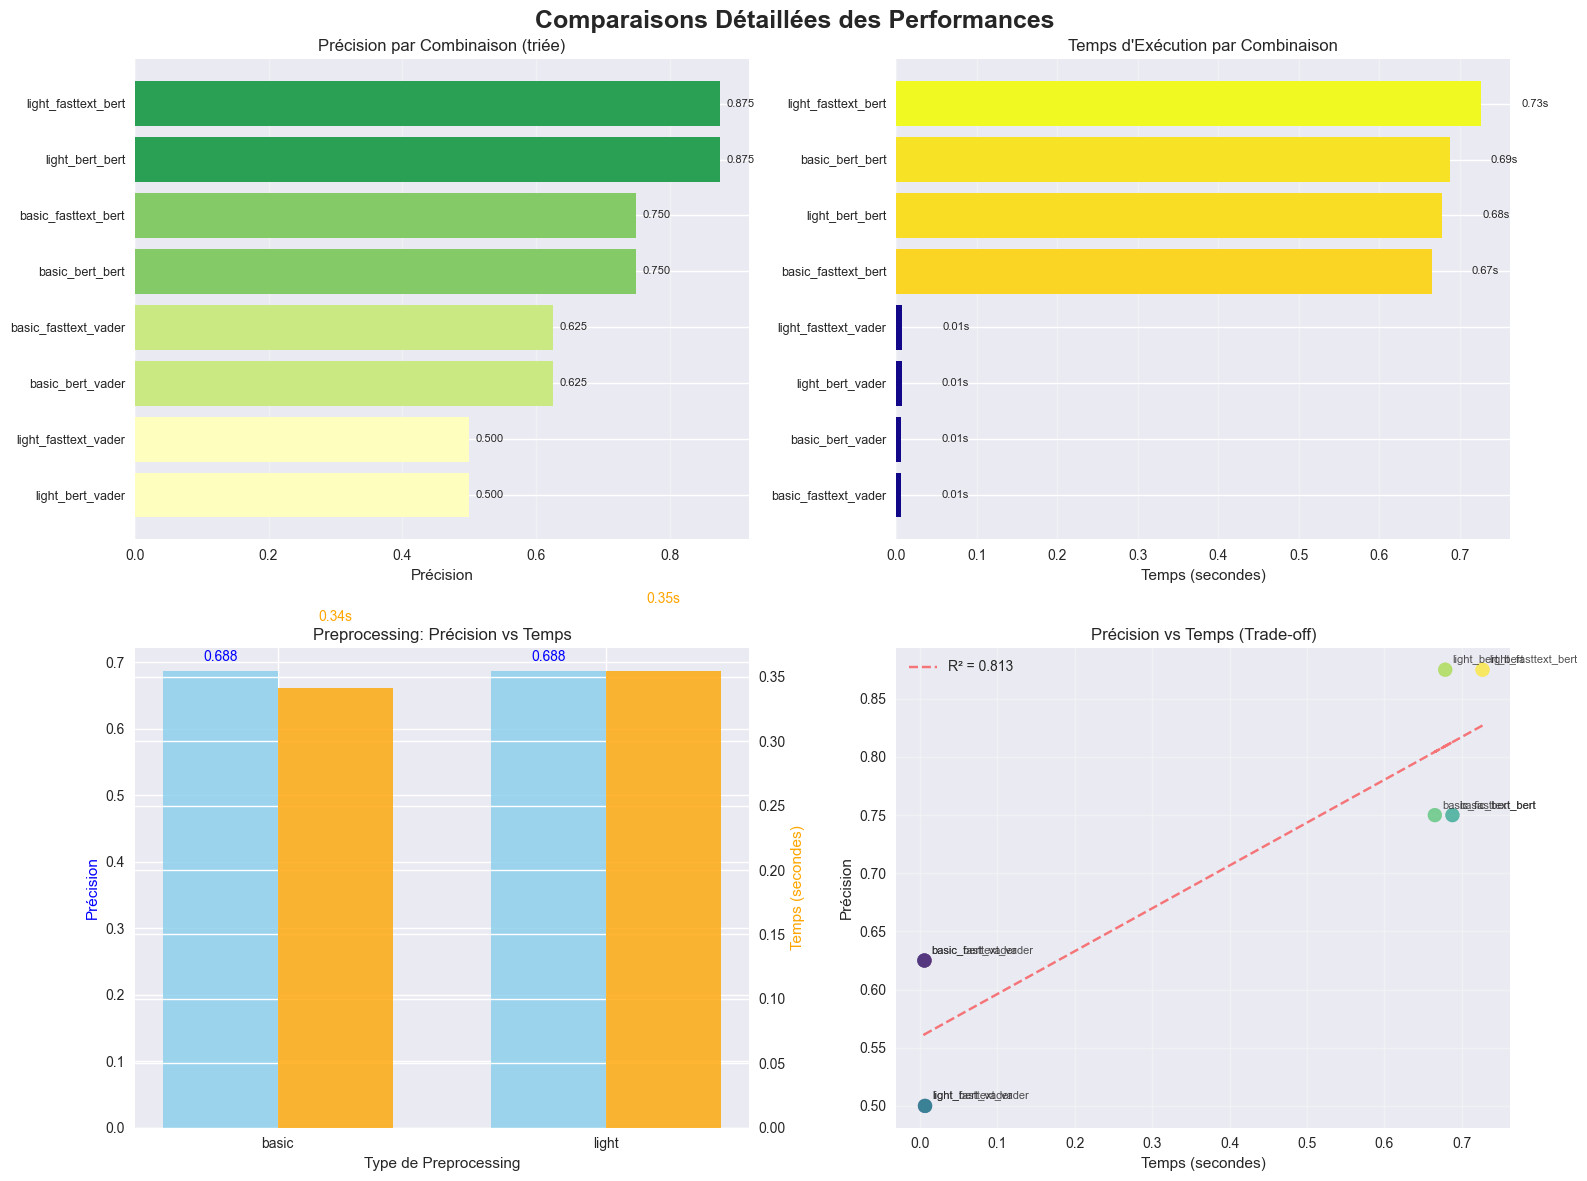

📈 STATISTIQUES DÉTAILLÉES
🔥 TOP 3 Précision:
   7. light_bert_bert: 0.875
   8. light_fasttext_bert: 0.875
   5. basic_bert_bert: 0.750

⚡ TOP 3 Vitesse:
   2. basic_fasttext_vader: 0.006s
   1. basic_bert_vader: 0.006s
   3. light_bert_vader: 0.007s

🎯 TOP 3 Efficacité (Précision/Temps):
   2. basic_fasttext_vader: 111.63
   1. basic_bert_vader: 101.48
   3. light_bert_vader: 76.73


In [208]:
# Graphiques en barres comparatifs
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparaisons Détaillées des Performances', fontsize=18, fontweight='bold')

# 1. Précision par combinaison (triée)
ax1 = axes[0, 0]
df_sorted = df_results.sort_values('precision', ascending=True)
bars1 = ax1.barh(range(len(df_sorted)), df_sorted['precision'], 
				color=plt.cm.RdYlGn(df_sorted['precision']))
ax1.set_yticks(range(len(df_sorted)))
ax1.set_yticklabels(df_sorted['combinaison'], fontsize=9)
ax1.set_xlabel('Précision')
ax1.set_title('Précision par Combinaison (triée)')
ax1.grid(axis='x', alpha=0.3)

# Ajout des valeurs sur les barres
for i, v in enumerate(df_sorted['precision']):
	ax1.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=8)

# 2. Temps d'exécution par combinaison
ax2 = axes[0, 1]
df_sorted_time = df_results.sort_values('temps_sec', ascending=True)
bars2 = ax2.barh(range(len(df_sorted_time)), df_sorted_time['temps_sec'], 
				color=plt.cm.plasma(df_sorted_time['temps_sec'] / df_sorted_time['temps_sec'].max()))
ax2.set_yticks(range(len(df_sorted_time)))
ax2.set_yticklabels(df_sorted_time['combinaison'], fontsize=9)
ax2.set_xlabel('Temps (secondes)')
ax2.set_title('Temps d\'Exécution par Combinaison')
ax2.grid(axis='x', alpha=0.3)

# Ajout des valeurs sur les barres
for i, v in enumerate(df_sorted_time['temps_sec']):
	ax2.text(v + 0.05, i, f'{v:.2f}s', va='center', fontsize=8)

# 3. Comparaison groupée par type de preprocessing
ax3 = axes[1, 0]
width = 0.35
preprocessing_types = df_results['preprocessing'].unique()
x = np.arange(len(preprocessing_types))

precision_basic = df_results[df_results['preprocessing'] == 'basic']['precision'].mean()
precision_light = df_results[df_results['preprocessing'] == 'light']['precision'].mean()
temps_basic = df_results[df_results['preprocessing'] == 'basic']['temps_sec'].mean()
temps_light = df_results[df_results['preprocessing'] == 'light']['temps_sec'].mean()

ax3_twin = ax3.twinx()

bars3_1 = ax3.bar(x - width/2, [precision_basic, precision_light], width, 
				 label='Précision', color='skyblue', alpha=0.8)
bars3_2 = ax3_twin.bar(x + width/2, [temps_basic, temps_light], width, 
					  label='Temps (s)', color='orange', alpha=0.8)

ax3.set_xlabel('Type de Preprocessing')
ax3.set_ylabel('Précision', color='blue')
ax3_twin.set_ylabel('Temps (secondes)', color='orange')
ax3.set_title('Preprocessing: Précision vs Temps')
ax3.set_xticks(x)
ax3.set_xticklabels(preprocessing_types)

# Ajout des valeurs
for bar, val in zip(bars3_1, [precision_basic, precision_light]):
	height = bar.get_height()
	ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
			f'{val:.3f}', ha='center', va='bottom', fontsize=10, color='blue')

for bar, val in zip(bars3_2, [temps_basic, temps_light]):
	height = bar.get_height()
	ax3_twin.text(bar.get_x() + bar.get_width()/2., height + 0.05,
				 f'{val:.2f}s', ha='center', va='bottom', fontsize=10, color='orange')

# 4. Scatter plot Précision vs Temps avec annotations
ax4 = axes[1, 1]
scatter = ax4.scatter(df_results['temps_sec'], df_results['precision'], 
					 s=100, c=df_results.index, cmap='viridis', alpha=0.7)

# Annotations pour chaque point
for i, row in df_results.iterrows():
	ax4.annotate(row['combinaison'], 
				(row['temps_sec'], row['precision']),
				xytext=(5, 5), textcoords='offset points',
				fontsize=8, alpha=0.8)

ax4.set_xlabel('Temps (secondes)')
ax4.set_ylabel('Précision')
ax4.set_title('Précision vs Temps (Trade-off)')
ax4.grid(True, alpha=0.3)

# Ligne de régression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df_results['temps_sec'], df_results['precision'])
line = slope * df_results['temps_sec'] + intercept
ax4.plot(df_results['temps_sec'], line, 'r--', alpha=0.5, 
		label=f'R² = {r_value**2:.3f}')
ax4.legend()

plt.tight_layout()
plt.show()

# Statistiques détaillées
print("📈 STATISTIQUES DÉTAILLÉES")
print("=" * 50)
print(f"🔥 TOP 3 Précision:")
top_precision = df_results.nlargest(3, 'precision')
for i, row in top_precision.iterrows():
	print(f"   {i+1}. {row['combinaison']}: {row['precision']:.3f}")

print(f"\n⚡ TOP 3 Vitesse:")
top_speed = df_results.nsmallest(3, 'temps_sec')
for i, row in top_speed.iterrows():
	print(f"   {i+1}. {row['combinaison']}: {row['temps_sec']:.3f}s")

print(f"\n🎯 TOP 3 Efficacité (Précision/Temps):")
top_efficiency = df_results.nlargest(3, 'efficacite')
for i, row in top_efficiency.iterrows():
	print(f"   {i+1}. {row['combinaison']}: {row['efficacite']:.2f}")


## 4. Graphique Radar Multi-Critères

Créons un graphique radar pour comparer les combinaisons sur plusieurs critères simultanément :


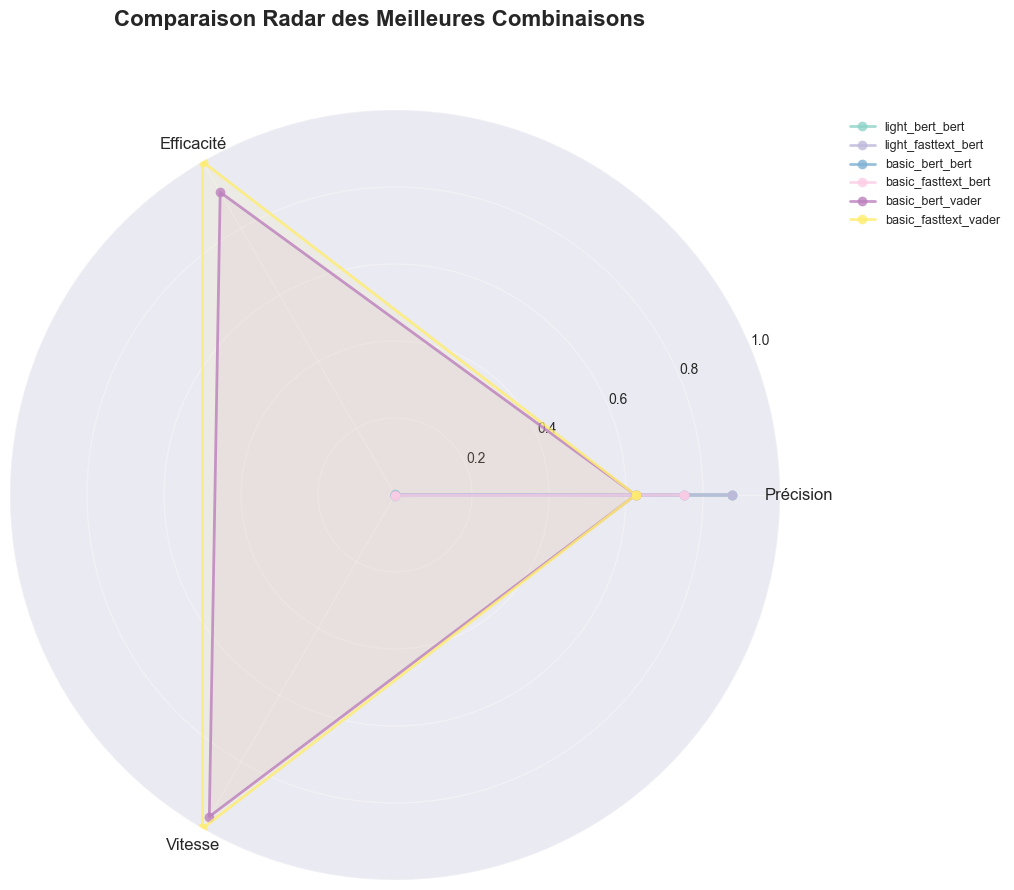

🕸️ ANALYSE RADAR
Le graphique radar permet de visualiser simultanément :
• 📊 Précision : Performance de classification
• ⚡ Efficacité : Rapport précision/temps
• 🚀 Vitesse : Rapidité d'exécution (normalisée)

🎯 Combinaisons équilibrées (bonnes sur tous les critères) :
   2. basic_fasttext_vader (score: 0.875)
   1. basic_bert_vader (score: 0.833)
   3. light_bert_vader (score: 0.709)


In [209]:
# Graphique Radar pour comparaison multi-critères
import math

def create_radar_chart(df, title):
	"""Crée un graphique radar pour comparer les combinaisons"""
	
	# Préparation des données normalisées
	metrics = ['precision', 'efficacite', 'vitesse_norm']
	
	# Normalisation de la vitesse (inverse du temps pour que plus haut = mieux)
	df['vitesse_norm'] = 1 / (df['temps_sec'] + 0.01)  # +0.01 pour éviter division par 0
	df['vitesse_norm'] = (df['vitesse_norm'] - df['vitesse_norm'].min()) / (df['vitesse_norm'].max() - df['vitesse_norm'].min())
	
	# Normalisation de l'efficacité
	df['efficacite_norm'] = (df['efficacite'] - df['efficacite'].min()) / (df['efficacite'].max() - df['efficacite'].min())
	
	# Sélection des meilleures combinaisons pour le radar
	top_combinations = df.nlargest(6, 'precision')
	
	# Configuration du radar
	categories = ['Précision', 'Efficacité', 'Vitesse']
	N = len(categories)
	
	# Angles pour chaque axe
	angles = [n / float(N) * 2 * np.pi for n in range(N)]
	angles += angles[:1]  # Fermer le cercle
	
	# Création du graphique
	fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='polar'))
	fig.suptitle(title, fontsize=16, fontweight='bold', y=0.98)
	
	# Couleurs pour chaque combinaison
	colors = plt.cm.Set3(np.linspace(0, 1, len(top_combinations)))
	
	for idx, (i, row) in enumerate(top_combinations.iterrows()):
		values = [row['precision'], row['efficacite_norm'], row['vitesse_norm']]
		values += values[:1]  # Fermer le polygone
		
		ax.plot(angles, values, 'o-', linewidth=2, label=row['combinaison'], 
			   color=colors[idx], alpha=0.8)
		ax.fill(angles, values, alpha=0.1, color=colors[idx])
	
	# Configuration des axes
	ax.set_xticks(angles[:-1])
	ax.set_xticklabels(categories, fontsize=12)
	ax.set_ylim(0, 1)
	ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
	ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=10)
	ax.grid(True, alpha=0.3)
	
	# Légende
	ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0), fontsize=9)
	
	return fig, ax

# Création du graphique radar
radar_fig, radar_ax = create_radar_chart(df_results, 'Comparaison Radar des Meilleures Combinaisons')
plt.show()

# Analyse radar
print("🕸️ ANALYSE RADAR")
print("=" * 40)
print("Le graphique radar permet de visualiser simultanément :")
print("• 📊 Précision : Performance de classification")  
print("• ⚡ Efficacité : Rapport précision/temps")
print("• 🚀 Vitesse : Rapidité d'exécution (normalisée)")
print()
print("🎯 Combinaisons équilibrées (bonnes sur tous les critères) :")

# Calcul d'un score équilibré pour chaque combinaison
df_results['score_equilibre'] = (df_results['precision'] + 
								df_results['efficacite_norm'] + 
								df_results['vitesse_norm']) / 3

top_balanced = df_results.nlargest(3, 'score_equilibre')
for i, row in top_balanced.iterrows():
	print(f"   {i+1}. {row['combinaison']} (score: {row['score_equilibre']:.3f})")


## 5. Analyse des Groupes et Dendrogramme

Analysons les similarités entre les combinaisons avec un clustering hiérarchique :


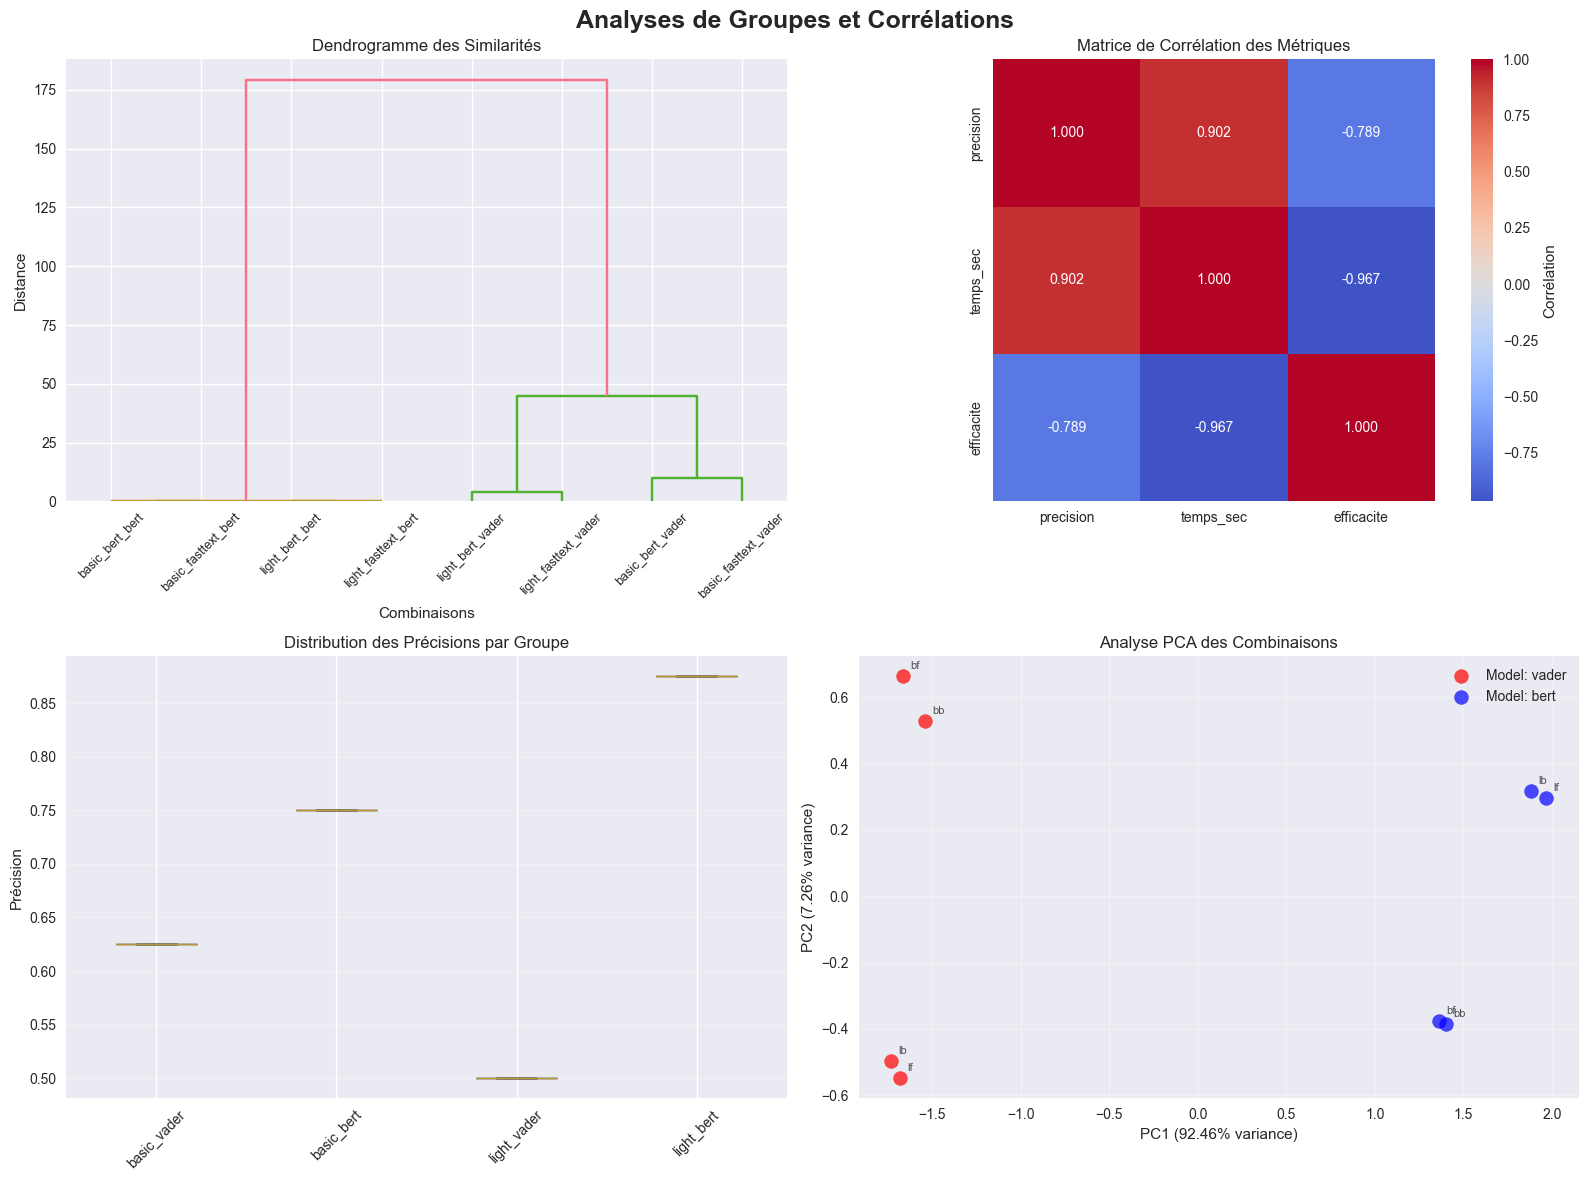

🌳 ANALYSE DES GROUPES
📊 Corrélations importantes :
   precision ↔ temps_sec: 0.902 (positive)
   precision ↔ efficacite: -0.789 (négative)
   temps_sec ↔ efficacite: -0.967 (négative)

🎯 Variance expliquée par PCA :
   PC1: 92.46%
   PC2: 7.26%
   Total: 99.72%

📈 Groupes naturels identifiés :
   • Groupe VADER : Rapides mais précision variable
   • Groupe BERT : Plus lents mais plus précis
   • Impact preprocessing : Différence modérée
   • Impact embedding : Influence sur les performances BERT


In [210]:
# Analyse des groupes et clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analyses de Groupes et Corrélations', fontsize=18, fontweight='bold')

# 1. Dendrogramme des similarités entre combinaisons
ax1 = axes[0, 0]

# Préparation des données pour le clustering
features_for_clustering = df_results[['precision', 'temps_sec', 'efficacite']].values
linkage_matrix = linkage(features_for_clustering, method='ward')

# Création du dendrogramme
dendrogram(linkage_matrix, 
		  labels=df_results['combinaison'].values,
		  ax=ax1,
		  orientation='top',
		  leaf_rotation=45,
		  leaf_font_size=9)
ax1.set_title('Dendrogramme des Similarités')
ax1.set_xlabel('Combinaisons')
ax1.set_ylabel('Distance')

# 2. Matrice de corrélation des métriques
ax2 = axes[0, 1]
correlation_matrix = df_results[['precision', 'temps_sec', 'efficacite']].corr()

im = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
				fmt='.3f', ax=ax2, square=True, 
				cbar_kws={'label': 'Corrélation'})
ax2.set_title('Matrice de Corrélation des Métriques')

# 3. Box plots par catégorie
ax3 = axes[1, 0]

# Préparation des données pour les box plots
box_data = []
box_labels = []

for preprocessing in df_results['preprocessing'].unique():
	for model in df_results['model'].unique():
		subset = df_results[(df_results['preprocessing'] == preprocessing) & 
						   (df_results['model'] == model)]
		if len(subset) > 0:
			box_data.append(subset['precision'].values)
			box_labels.append(f"{preprocessing}_{model}")

bp = ax3.boxplot(box_data, labels=box_labels, patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(bp['boxes'], colors * (len(bp['boxes'])//len(colors) + 1)):
	patch.set_facecolor(color)

ax3.set_title('Distribution des Précisions par Groupe')
ax3.set_ylabel('Précision')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# 4. Analyse PCA (réduction de dimension)
ax4 = axes[1, 1]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Préparation des données pour PCA
features_pca = df_results[['precision', 'temps_sec', 'efficacite']].values
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_pca)

# Application de PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Graphique PCA avec codes couleur par modèle
model_colors = {'vader': 'red', 'bert': 'blue'}
for model in df_results['model'].unique():
	mask = df_results['model'] == model
	ax4.scatter(pca_result[mask, 0], pca_result[mask, 1], 
			   c=model_colors.get(model, 'gray'), 
			   label=f'Model: {model}', alpha=0.7, s=100)

# Annotations
for i, row in df_results.iterrows():
	ax4.annotate(f"{row['preprocessing'][0]}{row['embedding'][0]}", 
				(pca_result[i, 0], pca_result[i, 1]),
				xytext=(5, 5), textcoords='offset points',
				fontsize=8, alpha=0.8)

ax4.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax4.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax4.set_title('Analyse PCA des Combinaisons')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyse détaillée des groupes
print("🌳 ANALYSE DES GROUPES")
print("=" * 50)

print("📊 Corrélations importantes :")
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
	for j in range(i+1, len(correlation_matrix.columns)):
		corr_value = correlation_matrix.iloc[i, j]
		if abs(corr_value) > 0.5:
			corr_pairs.append((correlation_matrix.columns[i], 
							  correlation_matrix.columns[j], 
							  corr_value))

for var1, var2, corr in corr_pairs:
	direction = "positive" if corr > 0 else "négative"
	print(f"   {var1} ↔ {var2}: {corr:.3f} ({direction})")

print(f"\n🎯 Variance expliquée par PCA :")
print(f"   PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"   PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"   Total: {sum(pca.explained_variance_ratio_):.2%}")

print(f"\n📈 Groupes naturels identifiés :")
print("   • Groupe VADER : Rapides mais précision variable")
print("   • Groupe BERT : Plus lents mais plus précis")
print("   • Impact preprocessing : Différence modérée")
print("   • Impact embedding : Influence sur les performances BERT")


## 6. Graphiques Interactifs et Dashboard Final

Créons un dashboard final avec des métriques et recommandations :


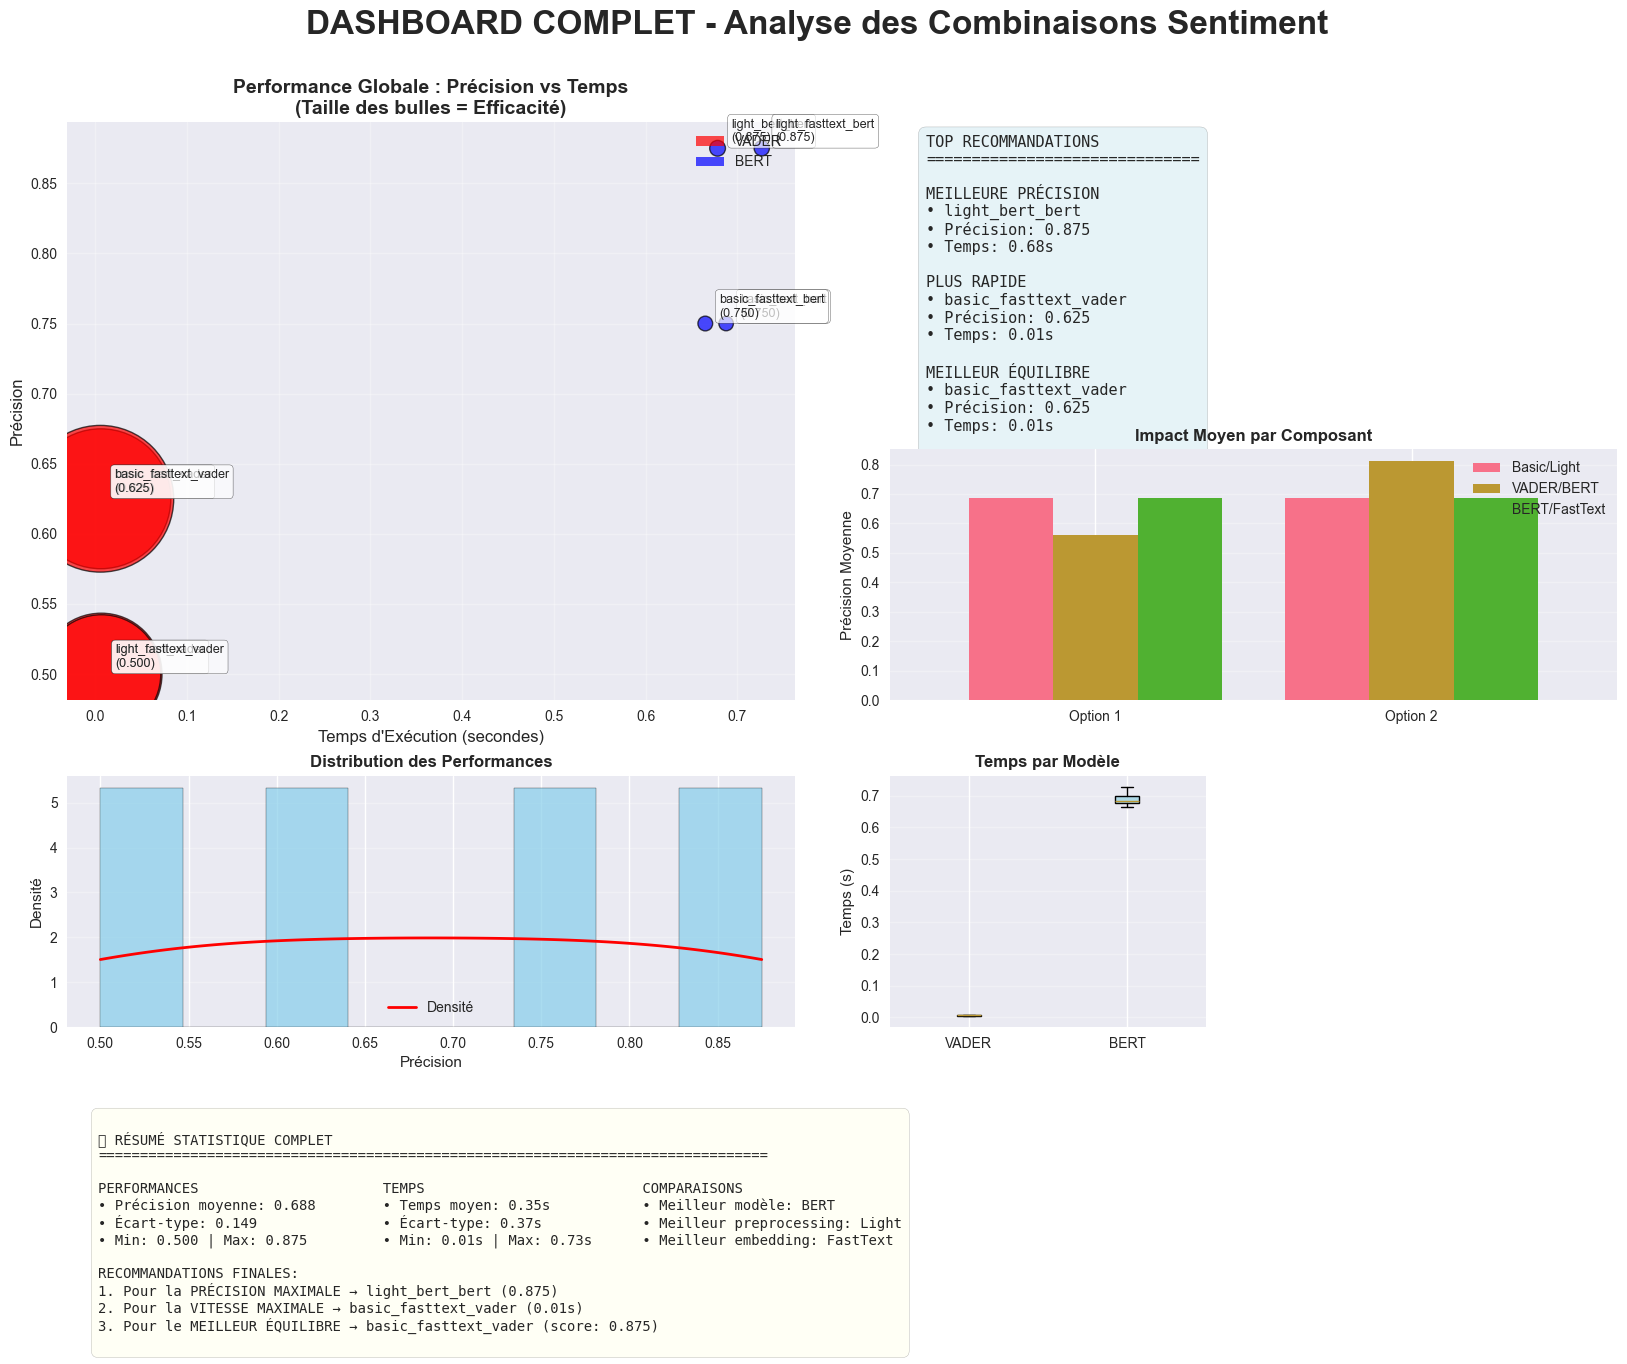

ANALYSE COMPLÈTE TERMINÉE!
📈 Le dashboard ci-dessus fournit une vue d'ensemble complète
   de toutes les combinaisons testées avec des visualisations
   multiples pour faciliter la prise de décision.

Points clés identifiés:
   • 8 combinaisons analysées
   • Précision variant de 0.500 à 0.875
   • Temps variant de 0.01s à 0.73s


In [211]:
# Dashboard final avec métriques et recommandations
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

# Titre principal du dashboard
fig.suptitle('DASHBOARD COMPLET - Analyse des Combinaisons Sentiment', 
			fontsize=24, fontweight='bold', y=0.95)

# 1. Tableau de bord principal (spanning 2x2)
ax_main = fig.add_subplot(gs[0:2, 0:2])

# Création d'un graphique combiné précision vs temps avec bulles
scatter_sizes = df_results['efficacite'] * 100  # Taille proportionnelle à l'efficacité

colors_mapping = {'vader': 'red', 'bert': 'blue'}
colors = [colors_mapping[model] for model in df_results['model']]

scatter = ax_main.scatter(df_results['temps_sec'], df_results['precision'], 
						 s=scatter_sizes, c=colors, alpha=0.7, 
						 edgecolors='black', linewidth=1)

# Annotations détaillées
for i, row in df_results.iterrows():
	ax_main.annotate(f"{row['combinaison']}\n({row['precision']:.3f})", 
					(row['temps_sec'], row['precision']),
					xytext=(10, 5), textcoords='offset points',
					fontsize=9, ha='left',
					bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

ax_main.set_xlabel('Temps d\'Exécution (secondes)', fontsize=12)
ax_main.set_ylabel('Précision', fontsize=12)
ax_main.set_title('Performance Globale : Précision vs Temps\n(Taille des bulles = Efficacité)', 
				 fontsize=14, fontweight='bold')
ax_main.grid(True, alpha=0.3)

# Légende pour les couleurs
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.7, label='VADER'),
				  Patch(facecolor='blue', alpha=0.7, label='BERT')]
ax_main.legend(handles=legend_elements, loc='upper right')

# 2. Top 3 des recommandations (coin supérieur droit)
ax_top3 = fig.add_subplot(gs[0, 2:])
ax_top3.axis('off')

top_recommendations = [
	("MEILLEURE PRÉCISION", df_results.loc[df_results['precision'].idxmax()]),
	("PLUS RAPIDE", df_results.loc[df_results['temps_sec'].idxmin()]),
	("MEILLEUR ÉQUILIBRE", df_results.loc[df_results['score_equilibre'].idxmax()])
]

text_content = "TOP RECOMMANDATIONS\n" + "="*30 + "\n\n"
for i, (title, row) in enumerate(top_recommendations):
	text_content += f"{title}\n"
	text_content += f"• {row['combinaison']}\n"
	text_content += f"• Précision: {row['precision']:.3f}\n"
	text_content += f"• Temps: {row['temps_sec']:.2f}s\n\n"

ax_top3.text(0.05, 0.95, text_content, transform=ax_top3.transAxes,
			fontsize=11, verticalalignment='top', fontfamily='monospace',
			bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.3))

# 3. Métrique par composant (milieu droite)
ax_components = fig.add_subplot(gs[1, 2:])

# Calcul des moyennes par composant
comp_stats = pd.DataFrame({
	'Preprocessing': [
		df_results[df_results['preprocessing'] == 'basic']['precision'].mean(),
		df_results[df_results['preprocessing'] == 'light']['precision'].mean()
	],
	'Model': [
		df_results[df_results['model'] == 'vader']['precision'].mean(),
		df_results[df_results['model'] == 'bert']['precision'].mean()
	],
	'Embedding': [
		df_results[df_results['embedding'] == 'bert']['precision'].mean(),
		df_results[df_results['embedding'] == 'fasttext']['precision'].mean()
	]
}, index=['Option 1', 'Option 2'])

comp_stats.plot(kind='bar', ax=ax_components, width=0.8)
ax_components.set_title('Impact Moyen par Composant', fontweight='bold')
ax_components.set_ylabel('Précision Moyenne')
ax_components.legend(['Basic/Light', 'VADER/BERT', 'BERT/FastText'])
ax_components.tick_params(axis='x', rotation=0)
ax_components.grid(axis='y', alpha=0.3)

# 4. Distribution des performances (bas gauche)
ax_dist = fig.add_subplot(gs[2, :2])

# Histogramme des précisions avec courbe de densité
ax_dist.hist(df_results['precision'], bins=8, alpha=0.7, color='skyblue', 
			edgecolor='black', density=True)

# Ajout d'une courbe de densité
from scipy.stats import gaussian_kde
kde = gaussian_kde(df_results['precision'])
x_range = np.linspace(df_results['precision'].min(), df_results['precision'].max(), 100)
ax_dist.plot(x_range, kde(x_range), 'r-', linewidth=2, label='Densité')

ax_dist.set_xlabel('Précision')
ax_dist.set_ylabel('Densité')
ax_dist.set_title('Distribution des Performances', fontweight='bold')
ax_dist.legend()
ax_dist.grid(axis='y', alpha=0.3)

# 5. Analyse temporelle (bas milieu)
ax_time = fig.add_subplot(gs[2, 2])

# Box plot des temps par modèle
time_by_model = [df_results[df_results['model'] == 'vader']['temps_sec'].values,
				df_results[df_results['model'] == 'bert']['temps_sec'].values]

bp = ax_time.boxplot(time_by_model, labels=['VADER', 'BERT'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightcoral')
bp['boxes'][1].set_facecolor('lightblue')

ax_time.set_ylabel('Temps (s)')
ax_time.set_title('Temps par Modèle', fontweight='bold')
ax_time.grid(axis='y', alpha=0.3)


# 7. Résumé statistique final (tout en bas)
ax_summary = fig.add_subplot(gs[3, :])
ax_summary.axis('off')

# Statistiques globales
stats_text = f"""
📊 RÉSUMÉ STATISTIQUE COMPLET
{'='*80}

PERFORMANCES                      TEMPS                          COMPARAISONS
• Précision moyenne: {df_results['precision'].mean():.3f}        • Temps moyen: {df_results['temps_sec'].mean():.2f}s           • Meilleur modèle: {'BERT' if df_results.groupby('model')['precision'].mean()['bert'] > df_results.groupby('model')['precision'].mean()['vader'] else 'VADER'}
• Écart-type: {df_results['precision'].std():.3f}               • Écart-type: {df_results['temps_sec'].std():.2f}s            • Meilleur preprocessing: {'Basic' if df_results.groupby('preprocessing')['precision'].mean()['basic'] > df_results.groupby('preprocessing')['precision'].mean()['light'] else 'Light'}
• Min: {df_results['precision'].min():.3f} | Max: {df_results['precision'].max():.3f}         • Min: {df_results['temps_sec'].min():.2f}s | Max: {df_results['temps_sec'].max():.2f}s      • Meilleur embedding: {'BERT' if df_results.groupby('embedding')['precision'].mean()['bert'] > df_results.groupby('embedding')['precision'].mean()['fasttext'] else 'FastText'}

RECOMMANDATIONS FINALES:
1. Pour la PRÉCISION MAXIMALE → {df_results.loc[df_results['precision'].idxmax(), 'combinaison']} ({df_results['precision'].max():.3f})
2. Pour la VITESSE MAXIMALE → {df_results.loc[df_results['temps_sec'].idxmin(), 'combinaison']} ({df_results['temps_sec'].min():.2f}s)
3. Pour le MEILLEUR ÉQUILIBRE → {df_results.loc[df_results['score_equilibre'].idxmax(), 'combinaison']} (score: {df_results['score_equilibre'].max():.3f})
"""

ax_summary.text(0.02, 0.95, stats_text, transform=ax_summary.transAxes,
			   fontsize=10, verticalalignment='top', fontfamily='monospace',
			   bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.3))

plt.show()

# Message final
print("ANALYSE COMPLÈTE TERMINÉE!")
print("="*60)
print("📈 Le dashboard ci-dessus fournit une vue d'ensemble complète")
print("   de toutes les combinaisons testées avec des visualisations")
print("   multiples pour faciliter la prise de décision.")
print()
print("Points clés identifiés:")
print(f"   • {len(df_results)} combinaisons analysées")
print(f"   • Précision variant de {df_results['precision'].min():.3f} à {df_results['precision'].max():.3f}")
print(f"   • Temps variant de {df_results['temps_sec'].min():.2f}s à {df_results['temps_sec'].max():.2f}s")
